# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()

In [4]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [5]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [6]:
# * Print how long our dataframe is.
print(df.shape[0])

11194


In [5]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [6]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape[0])
df.isnull().sum()

11092


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

In [ ]:
df.head()

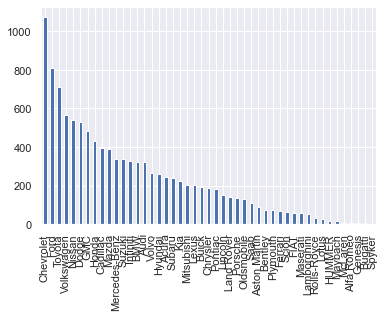

In [9]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
cb = df['Make'].value_counts()
cb.plot(kind='bar');

# Make the chart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

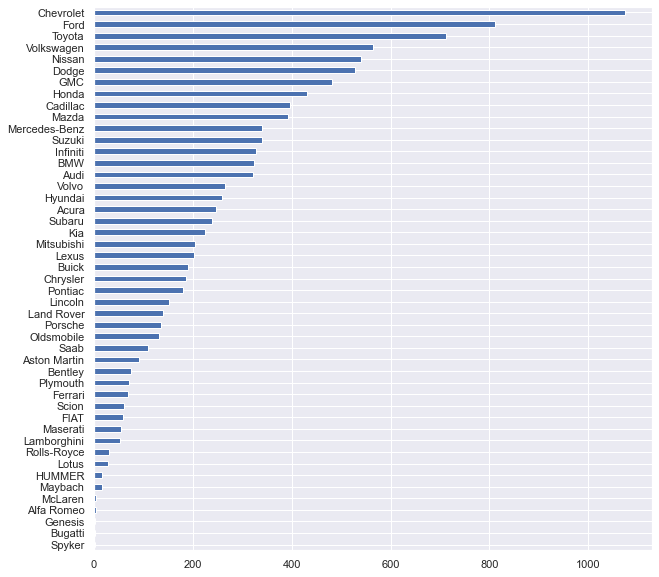

In [10]:
# Make the chart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
cb_sorted = cb.sort_values()
cb_sorted.plot(kind='barh', figsize=(10, 10));


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


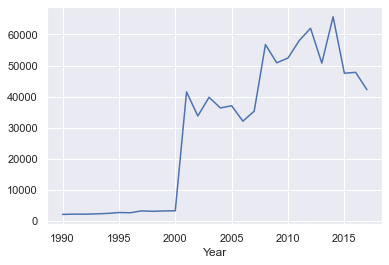

In [11]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
am = df.groupby('Year')['MSRP'].mean()

# Make a bar plot of said means
am.plot(kind='line');

# It seems as though in the years before (and including) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [7]:
# Make a column where is 10 when year is less than 2000, else 1.
condition = df['MSRP'] >= 2000

df['price_adjuster'] = np.where(condition, 10, 1)

# Multiply the MSRP by the price adjuster.

df['adjusted_price'] = df['MSRP']
df['adjusted_price'] = np.where(condition, df.adjusted_price * df.price_adjuster, df.adjusted_price) 

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,price_adjuster,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,10,461350
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,10,406500
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,10,363500
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,10,294500
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,10,345000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

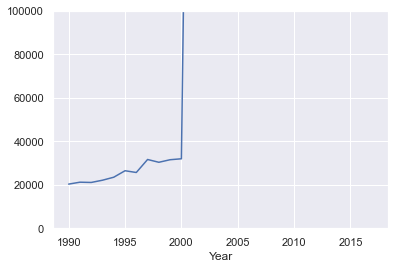

In [14]:
# Plot new prices
am = df.groupby('Year')['adjusted_price'].mean()
am.plot(kind='line', ylim = (0,100000));

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [15]:
# What are the top 5 car makers make the most expensive cars on average. 
cm = df.groupby('Make')['adjusted_price'].mean()
cm.sort_values(ascending=False).head()

Make
Bugatti        1.757224e+07
Maybach        5.462219e+06
Rolls-Royce    3.511306e+06
Lamborghini    3.315673e+06
Bentley        2.471693e+06
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [16]:
# Which car makers have the highest median highway MPG?
mh = df.groupby('Make')['highway MPG'].median()
mh.sort_values(ascending=False).head()

Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

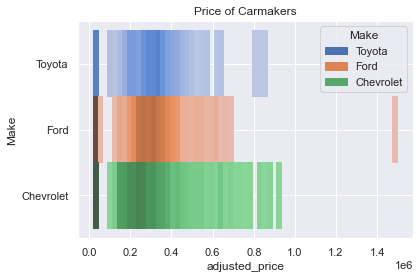

In [17]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

host_names = ['Chevrolet', 'Ford', 'Toyota']
condition = df.Make.isin(host_names)
temp_df = df[condition]

cr = sns.histplot(data=temp_df, x='adjusted_price', y='Make', hue='Make')
cr.set_title("Price of Carmakers");

# Remake the same histogram, but limit the x-axis from 0 to 100,000

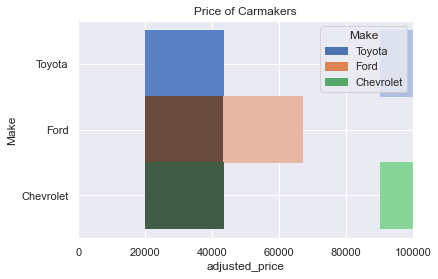

In [18]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
cr = sns.histplot(data=temp_df, x='adjusted_price', y='Make', hue='Make')
cr.set_title("Price of Carmakers");
cr.set_xlim(left=0, right=100000);

# Plot the relationship between Engine HP and highway MPG

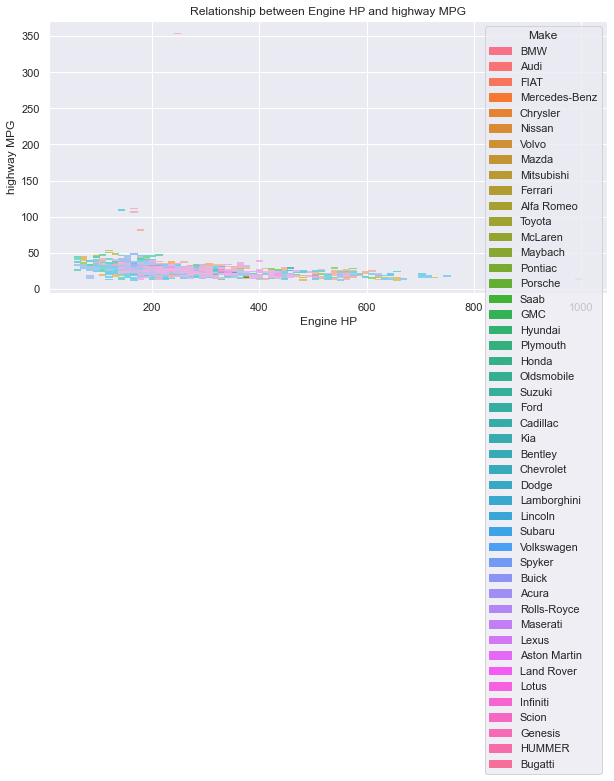

In [19]:
# Plot the relationship between Engine HP and highway MPG
sns.set(rc={"figure.figsize":(10, 5)})
eh = sns.histplot(data=df, x='Engine HP', y='highway MPG', hue='Make')
eh.set_title("Relationship between Engine HP and highway MPG");

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

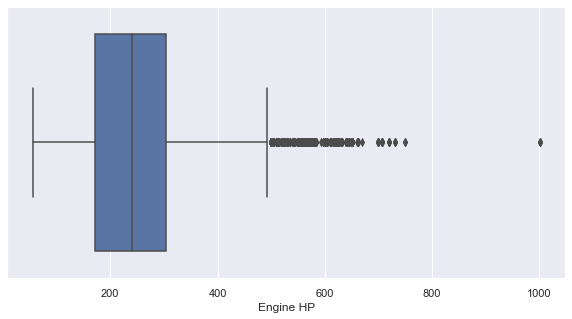

In [20]:
# create a boxplot for the 'Engine HP'
eh = sns.boxplot(data=df, x='Engine HP');

# Make another boxplot for highway MPG

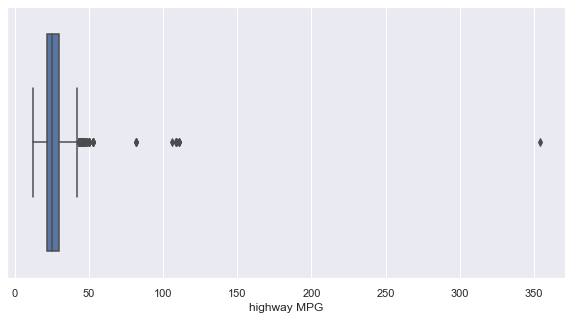

In [21]:
# create a boxplot for the 'highway MPG'
hm = sns.boxplot(data=df, x='highway MPG');

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [22]:
# Remove any  outliers from Engine HP and highway MPG

# From the lecture:

# Calculate Q1
Q1 = df['Engine HP'].quantile(0.25)

# Calculate Q3
Q3 = df['Engine HP'].quantile(0.75)

# Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['Engine HP'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['Engine HP'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df_eh = df[ ~(outliers_above | outliers_below) ]

In [23]:
# From the lecture:

# Calculate Q1
Q1 = df['highway MPG'].quantile(0.25)

# Calculate Q3
Q3 = df['highway MPG'].quantile(0.75)

# Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['highway MPG'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['highway MPG'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df_hm = df[ ~(outliers_above | outliers_below) ]

# Remake the boxplots for both Engine HP and highway MPG


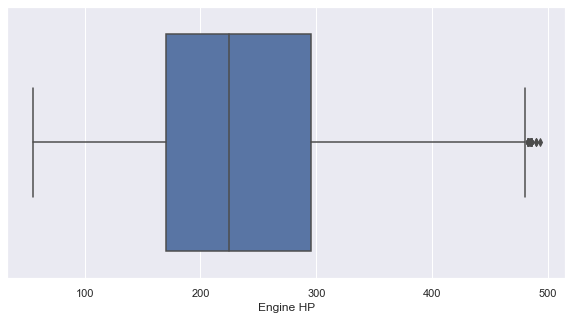

In [24]:
# Engine HP boxplot
eh = sns.boxplot(data=df_eh, x='Engine HP');

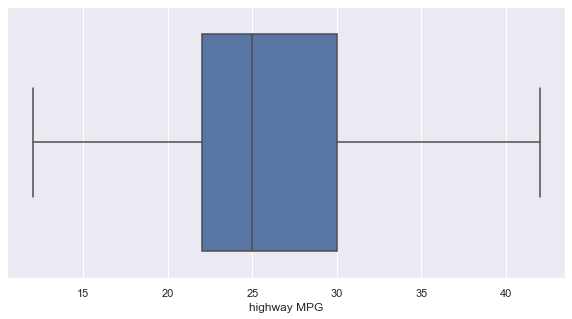

In [25]:
# highway MPG boxplot
hm = sns.boxplot(data=df_hm, x='highway MPG');

# Make a scatter plot of Engine HP vs highway MPG

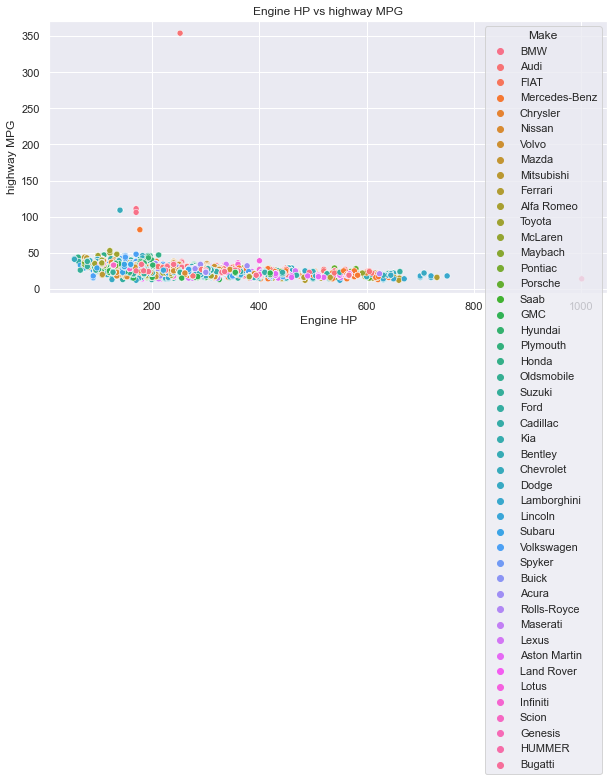

In [26]:
# Make a scatter plot of Engine HP vs highway MPG
exh = sns.scatterplot(data=df, x='Engine HP', y='highway MPG', hue='Make');
exh.set_title("Engine HP vs highway MPG");

# What does this plot tell you about how Engine HP affects highway MPG?

In [27]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Engine HP does not affect highway MPG much.')

Engine HP does not affect highway MPG much.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

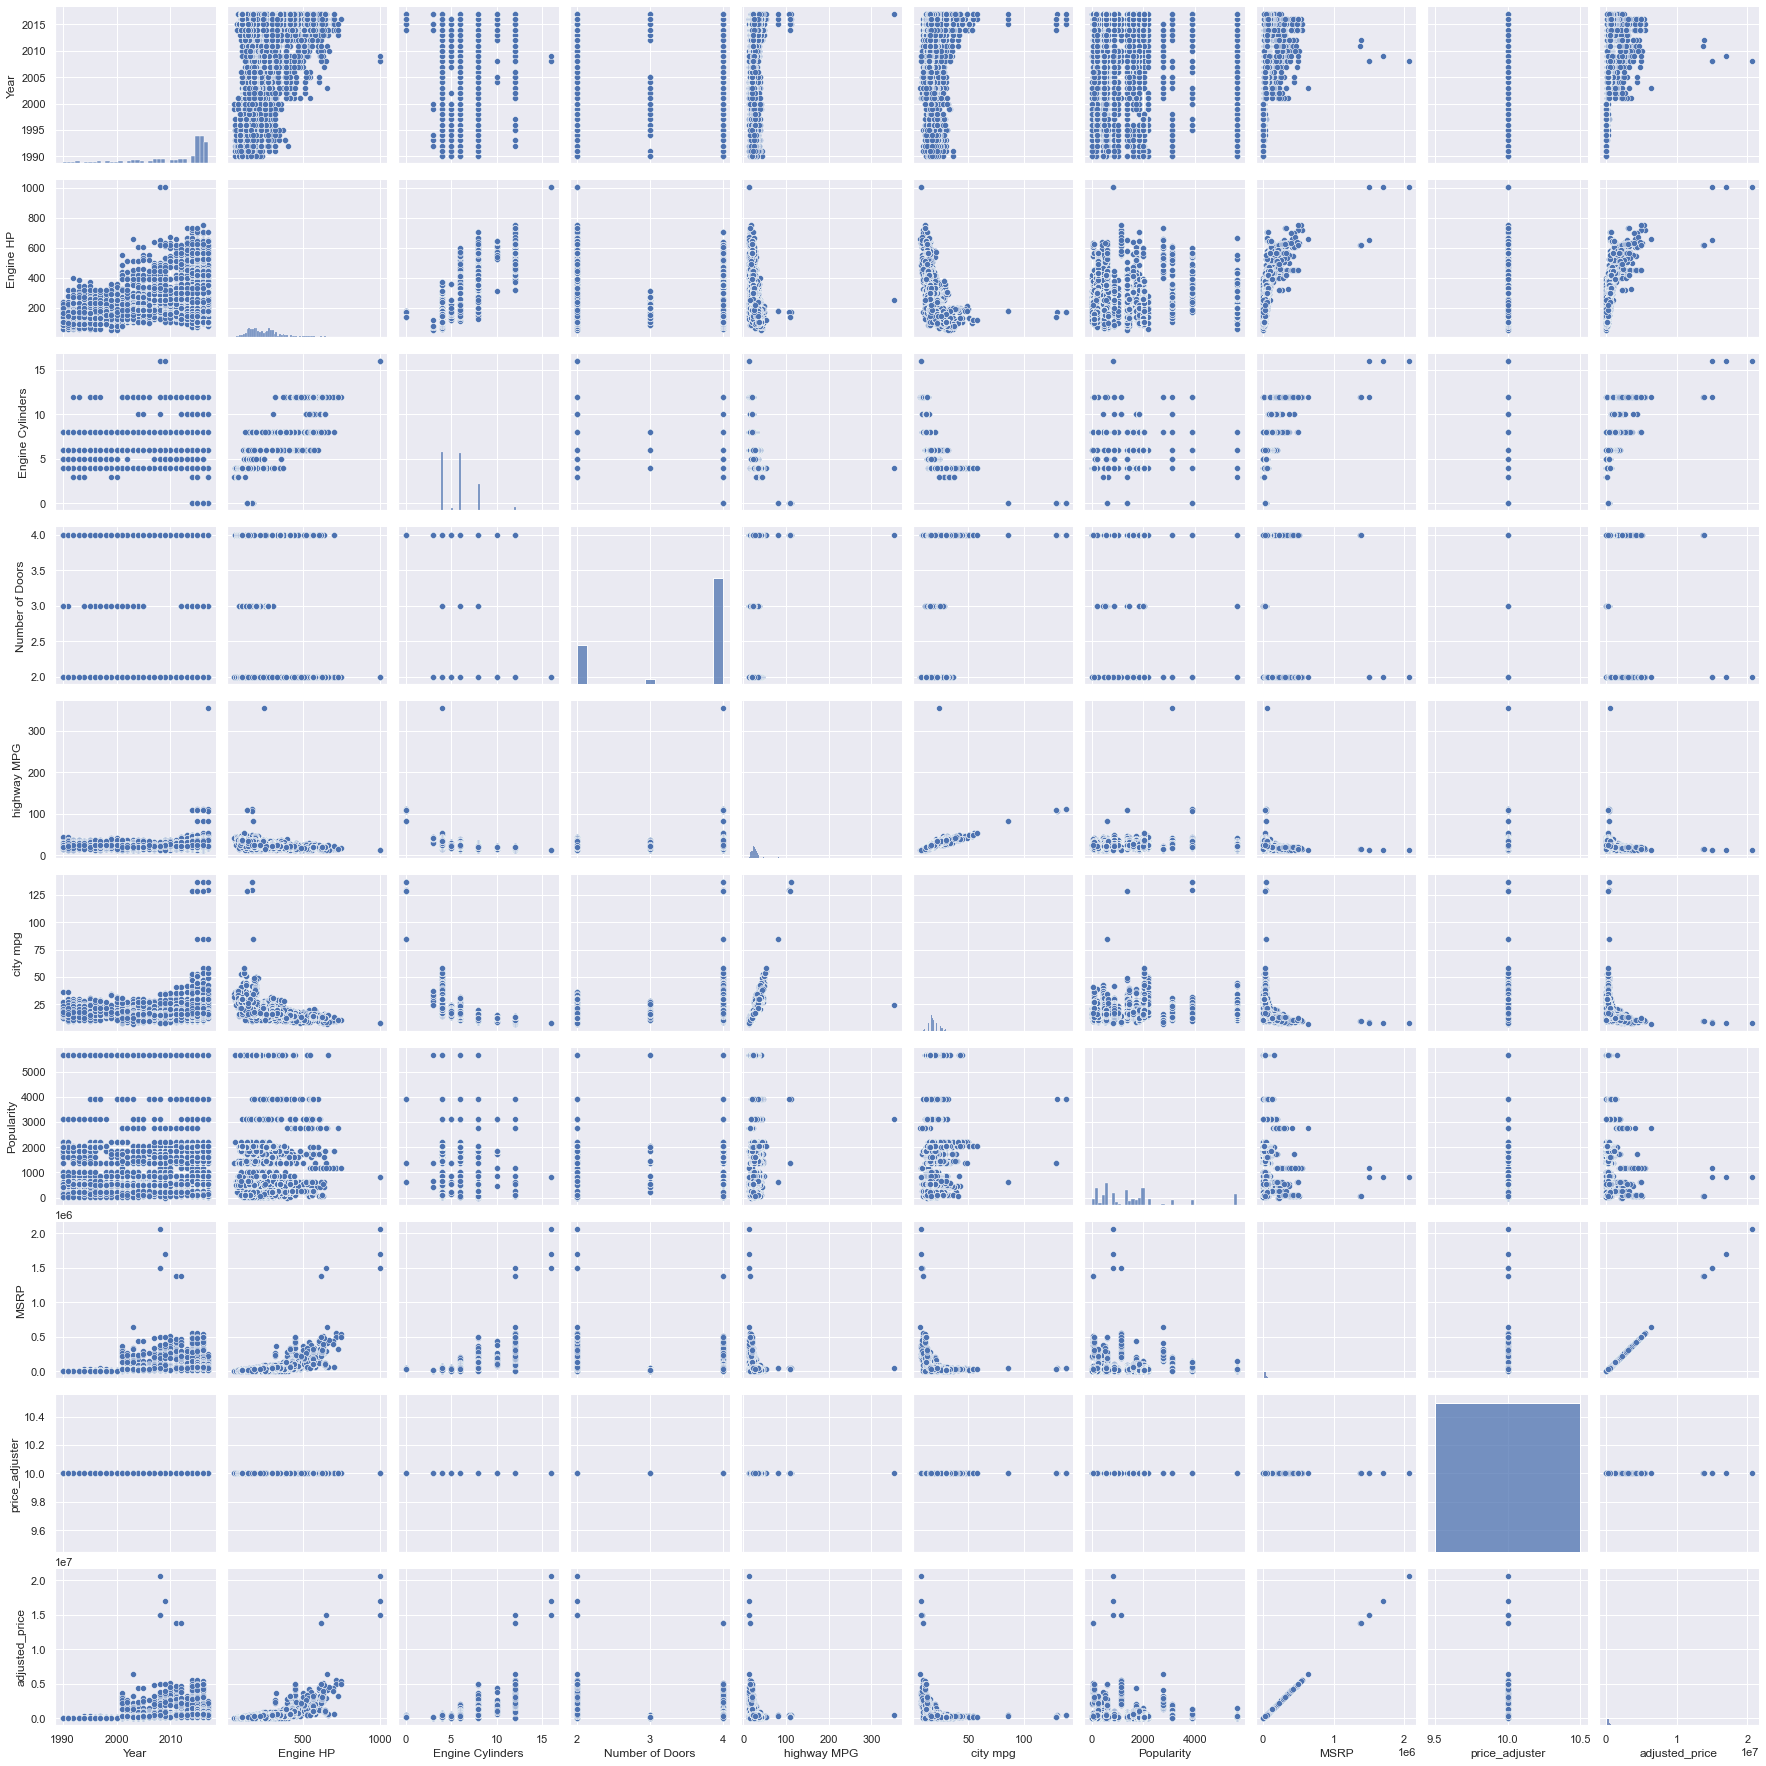

In [28]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df);

In [29]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('Besides MSRP and adjusted_price, the variables that look like they have the strongest linear relationship are:')
print('MSRP and Engine HP, and Engine HP and adjusted_price')

Besides MSRP and adjusted_price, the variables that look like they have the strongest linear relationship are:
MSRP and Engline HP


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

<AxesSubplot:>

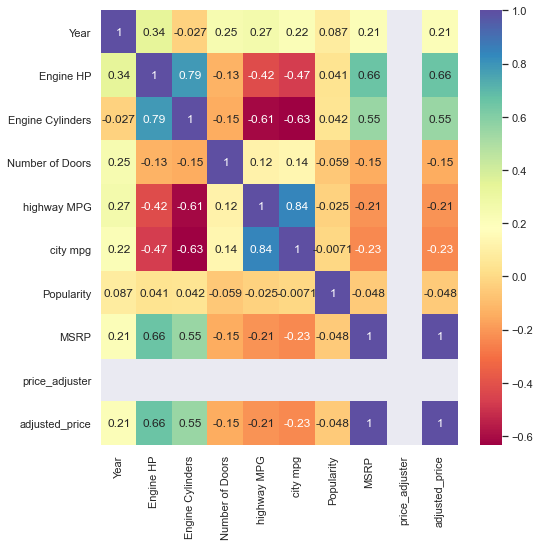

In [32]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
sns.set(rc={"figure.figsize":(8, 8)})
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [1]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with Engine Cylinders.')
print('That may be because, in a vehicle, the HorsePower of an engine increases as the size of its Cylinders increases.')

Engine HP has the strongest relationship with Engine Cylinders.
That may be because, in a vehicle, the HorsePower of an engine increases as the size of its Cylinders increases.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [19]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

df.columns= df.columns.str.lower() # changes all the column names to lower case

In [21]:
import re

df.filter(
    regex = r'\s' # all the column names that have a space
)

,engine fuel type,engine hp,engine cylinders,transmission type,number of doors,vehicle size,vehicle style,highway mpg,city mpg
0,premium unleaded (required),335.0,6.0,MANUAL,2.0,Compact,Coupe,26,19
1,premium unleaded (required),300.0,6.0,MANUAL,2.0,Compact,Convertible,28,19
2,premium unleaded (required),300.0,6.0,MANUAL,2.0,Compact,Coupe,28,20
3,premium unleaded (required),230.0,6.0,MANUAL,2.0,Compact,Coupe,28,18
4,premium unleaded (required),230.0,6.0,MANUAL,2.0,Compact,Convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,premium unleaded (required),300.0,6.0,AUTOMATIC,4.0,Midsize,4dr Hatchback,23,16
11910,premium unleaded (required),300.0,6.0,AUTOMATIC,4.0,Midsize,4dr Hatchback,23,16
11911,premium unleaded (required),300.0,6.0,AUTOMATIC,4.0,Midsize,4dr Hatchback,23,16
11912,premium unleaded (recommended),300.0,6.0,AUTOMATIC,4.0,Midsize,4dr Hatchback,23,16


In [25]:
df = df.rename(
    columns = {
        "engine fuel type": "engine_fuel_type",
        "engine hp": "engine_hp",
        "engine cylinders": "engine_cylinders",
        "transmission type": "transmission_type",
        "number of doors": "number_of_doors",
        "vehicle size": "vehicle_size",
        "vehicle style": "vehicle_style",
        "highway mpg": "highway_mpg",
        "city mpg": "city_mpg"
    }
)

In [28]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'price_adjuster', 'adjusted_price'],
      dtype='object')